In [1]:
import sys
sys.path.append("../")

from transforms import FeatureExtractor
import torchaudio
import matplotlib.pyplot as plt
import torch

/home/kpintaric/LUMEN-Data-Science-IRMAS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-18 18:00:28.018592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = "/home/kpintaric/LUMEN-Data-Science-IRMAS/data/processed/pitch_sync/IRMAS_Training_Data/sax-org/[sax][jaz_blu]1638__2-[org][pop_roc]1064__2.wav"

In [3]:
signal, sr = torchaudio.load(path)

In [4]:
extract_kaldi = FeatureExtractor(sr=sr)

In [5]:
spec_kaldi = extract_kaldi(signal)

In [6]:
spec_kaldi

tensor([[ 0.3080,  0.0308,  0.4076,  ...,  0.0196, -0.0321, -0.5037],
        [ 0.2479, -0.0064,  0.3704,  ..., -0.0551, -0.1039, -0.4397],
        [ 0.2616, -0.0079,  0.3689,  ...,  0.0274, -0.0363, -0.5309],
        ...,
        [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
        [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
        [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]])

In [6]:
fbank = torchaudio.compliance.kaldi.fbank(signal, htk_compat=True, sample_frequency=sr, use_energy=False,
                                                  window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

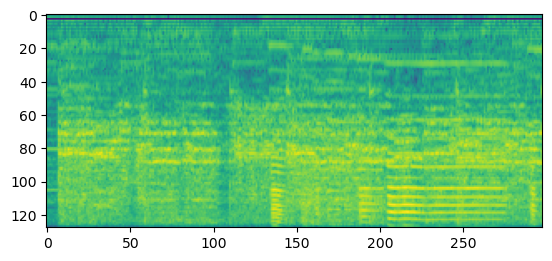

In [10]:
plt.imshow(fbank.T)

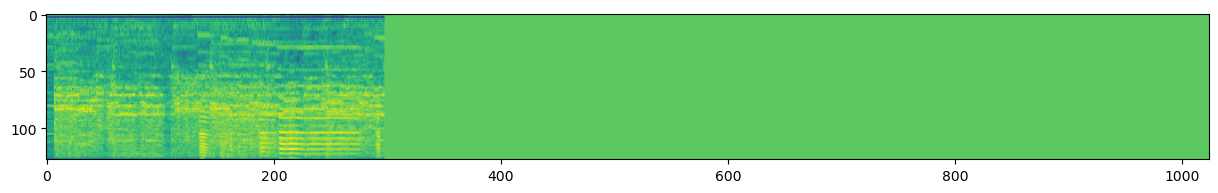

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(spec_kaldi.T)

In [18]:
spec_kaldi.shape

torch.Size([1024, 128])

In [27]:
fbank.mean()

tensor(-1.3925)

In [50]:
fbank

tensor([[-1.4528, -3.9863, -0.5429,  ..., -4.0891, -4.5609, -8.8704],
        [-2.0027, -4.3265, -0.8831,  ..., -4.7716, -5.2172, -8.2855],
        [-1.8775, -4.3400, -0.8966,  ..., -4.0175, -4.5993, -9.1191],
        ...,
        [-2.4921, -5.6281, -2.1847,  ..., -0.6202, -1.1779, -4.5013],
        [-2.5368, -4.8847, -1.4413,  ..., -1.2579, -2.0866, -5.8050],
        [-3.0357, -5.9717, -2.5283,  ..., -0.4504, -2.4237, -6.2018]])

In [21]:
((fbank + 4.2677393) / (2 * 4.5689974))

tensor([[ 0.3080,  0.0308,  0.4076,  ...,  0.0196, -0.0321, -0.5037],
        [ 0.2479, -0.0064,  0.3704,  ..., -0.0551, -0.1039, -0.4397],
        [ 0.2616, -0.0079,  0.3689,  ...,  0.0274, -0.0363, -0.5309],
        ...,
        [ 0.1943, -0.1489,  0.2280,  ...,  0.3992,  0.3381, -0.0256],
        [ 0.1894, -0.0675,  0.3093,  ...,  0.3294,  0.2387, -0.1682],
        [ 0.1348, -0.1865,  0.1904,  ...,  0.4177,  0.2018, -0.2117]])

In [18]:
spec_kaldi.shape

torch.Size([1024, 128])

In [22]:
preemphasis = 0.97

# Apply preemphasis filter
preemphasized_waveform = torch.cat([signal[:, :1], signal[:, 1:] - preemphasis * signal[:, :-1]], dim=1)


In [53]:
extract = torchaudio.transforms.MelSpectrogram(n_mels=128, hop_length=160, f_min=20, n_fft=800, center=False)
spec = extract(preemphasized_waveform)

In [54]:
#spec = torchaudio.transforms.AmplitudeToDB()(spec)

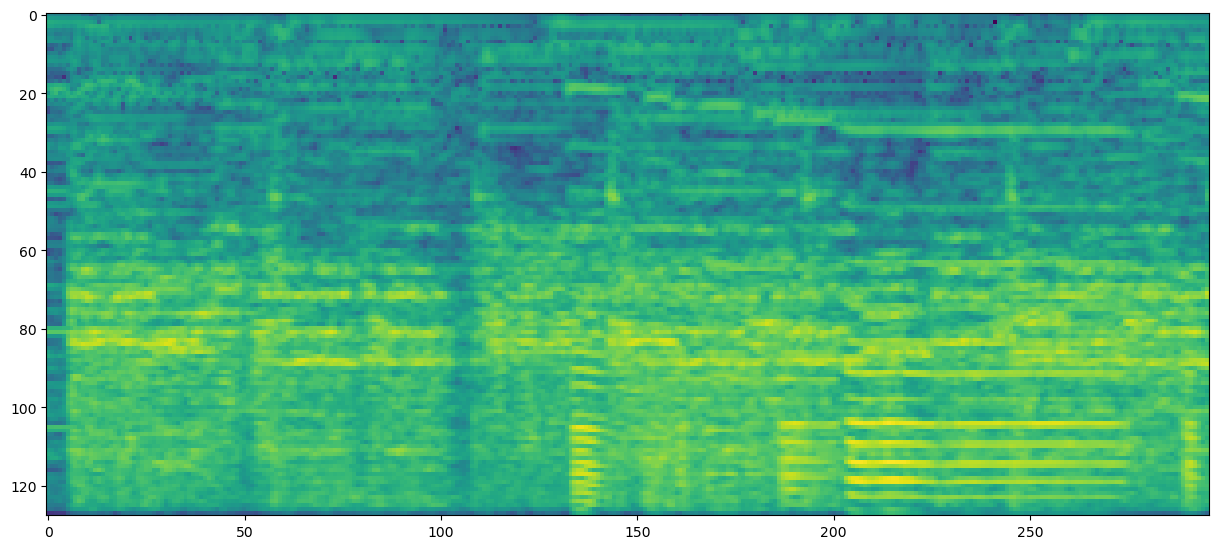

In [62]:
plt.figure(figsize=(15,10))
plt.imshow(np.log(spec).squeeze())

In [57]:
import numpy as np

In [63]:
np.log(spec)

tensor([[[-2.4929, -2.6024, -2.7545,  ..., -2.5194, -2.6350, -2.8748],
         [-0.9819, -1.1621, -1.3092,  ..., -1.6219, -1.7157, -1.8606],
         [ 0.2176,  0.0236, -0.1225,  ..., -0.5945, -0.6795, -0.7890],
         ...,
         [-3.1889, -3.2170, -3.4322,  ...,  0.9498,  0.5175,  0.2304],
         [-3.7563, -3.8722, -4.3600,  ...,  0.5853, -0.1706, -0.9769],
         [-7.8332, -7.6659, -7.3822,  ..., -2.8253, -3.6932, -4.7514]]])

In [45]:
from transforms import MinMaxScale

In [46]:
scale = MinMaxScale()
scale(spec).mean()

tensor(0.6069)

In [61]:
((spec_kaldi + 4.2677393) / (2 *4.5689974)).mean()

tensor(0.5133)

In [17]:
import sys
sys.path.append("../")
from utils import init_transforms, parse_config

In [18]:
config = parse_config("../config.yaml")

In [3]:
import transforms as transform_module

2023-03-16 20:37:15.881729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from transformers import (
    AutoModel, AutoConfig, 
    ASTFeatureExtractor, AutoFeatureExtractor
)
from functools import partial

In [3]:
_pretrained_model = "MIT/ast-finetuned-audioset-10-10-0.4593"

In [3]:
config = AutoConfig.from_pretrained(_pretrained_model)
config.update({'output_hidden_states':True})
model = AutoModel.from_pretrained(_pretrained_model, config=config)
extract = partial(ASTFeatureExtractor(return_attention_mask=True),sampling_rate=16000, return_tensors="pt")

Some weights of the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 were not used when initializing ASTModel: ['classifier.layernorm.bias', 'classifier.dense.weight', 'classifier.layernorm.weight', 'classifier.dense.bias']
- This IS expected if you are initializing ASTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ASTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
sample, _ = torchaudio.load('../data/processed/all_sync/IRMAS_Training_Data/sax-gac/[sax][pop_roc]1615__2-[gac][pop_roc]0731__2.wav')

In [8]:
input = extract(sample.squeeze())

In [9]:
output = model(input["input_values"])

In [10]:
import torch.nn as nn
import torch

In [11]:
all_hidden_states = torch.stack(output[2])

In [12]:
all_hidden_states.shape

torch.Size([13, 1, 1214, 768])

In [17]:
all_hidden_states = torch.stack(output[2])
class WeightedLayerPooling(nn.Module):
    def __init__(self, num_hidden_layers, layer_start: int = 4, layer_weights = None):
        super(WeightedLayerPooling, self).__init__()
        self.layer_start = layer_start
        self.num_hidden_layers = num_hidden_layers
        self.layer_weights = layer_weights if layer_weights is not None \
            else nn.Parameter(
                torch.tensor([1] * (num_hidden_layers+1 - layer_start), dtype=torch.float)
            )

    def forward(self, all_hidden_states):
        all_layer_embedding = all_hidden_states[self.layer_start:, :, :, :]
        weight_factor = self.layer_weights.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1).expand(all_layer_embedding.size())
        weighted_average = (weight_factor*all_layer_embedding).sum(dim=0) / self.layer_weights.sum()
        return weighted_average
    
layer_start = 9
pooler = WeightedLayerPooling(
    config.num_hidden_layers, 
    layer_start=layer_start, layer_weights=None
)
weighted_pooling_embeddings1 = pooler(all_hidden_states)
weighted_pooling_embeddings = weighted_pooling_embeddings[:, 0]
logits = nn.Linear(config.hidden_size, 11)(weighted_pooling_embeddings)

print(f'Hidden States Output Shape: {all_hidden_states.detach().numpy().shape}')
print(f'Weighted Pooling Output Shape: {weighted_pooling_embeddings.detach().numpy().shape}')
print(f'Logits Shape: {logits.detach().numpy().shape}')

Hidden States Output Shape: (13, 1, 1214, 768)
Weighted Pooling Output Shape: (1, 768)
Logits Shape: (1, 11)


In [5]:
from models import ASTWithWeightedLayerPooling

In [6]:
model = ASTWithWeightedLayerPooling("MIT/ast-finetuned-audioset-10-10-0.4593")

Some weights of the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 were not used when initializing ASTModel: ['classifier.dense.bias', 'classifier.layernorm.bias', 'classifier.layernorm.weight', 'classifier.dense.weight']
- This IS expected if you are initializing ASTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ASTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
from transforms import FeatureExtractor

In [8]:
extract = FeatureExtractor(sr=16000)

In [9]:
input = extract(sample)

In [11]:
input.shape

torch.Size([1024, 128])

In [13]:
output = model(input.unsqueeze(0))

In [15]:
from dataset import get_loader

In [20]:
config.train_dir = "../data/processed/all_sync/IRMAS_Training_Data/"
train_dl = get_loader(config, subset="train")

In [22]:
next(iter(train_dl))

(tensor([[[-4.4383e-01, -4.3515e-01, -2.2070e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [-7.6311e-01, -5.6852e-01, -4.5905e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [-3.8629e-01, -1.9170e-01, -8.2227e-02,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          ...,
          [ 5.4301e-01,  6.3975e-01,  7.8525e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [ 2.5805e-01,  4.9678e-01,  6.7909e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [ 6.9033e-02,  8.4351e-03,  1.6061e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01]],
 
         [[-2.3347e-01, -3.3028e-01, -5.6242e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [-5.7256e-01, -6.4503e-01, -9.1114e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          [-1.9573e-01, -2.6821e-01, -5.3431e-01,  ...,  4.6703e-01,
            4.6703e-01,  4.6703e-01],
          ...,
    